# Lab 6



## Introduction

The purpose of this lab exercise is to investigate the classical approach to face feature extraction based on the Principal Component Analysis (PCA), threshold-based face matching using Euclidean Distance (ED).

## Exercise 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage import exposure
import scipy.linalg as la

from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

from utils_cm import plot_confusion_matrix

import matplotlib as mpl

from matplotlib import rcParams

In [3]:
# setting the default colormap for images only
mpl.rc('image', cmap='gray')

rcParams.update({'figure.autolayout': True})

M = 9

um = 100
ustd = 80

dir_path = 'ATT dataset/'

path_1 = dir_path + 's2/'
path_2 = dir_path + 's3/'
path_3 = dir_path + 's4/'


path_arr = [path_1, path_2, path_3]

### Training Set


#### Load first 9 images as data for three different subjects from different directories

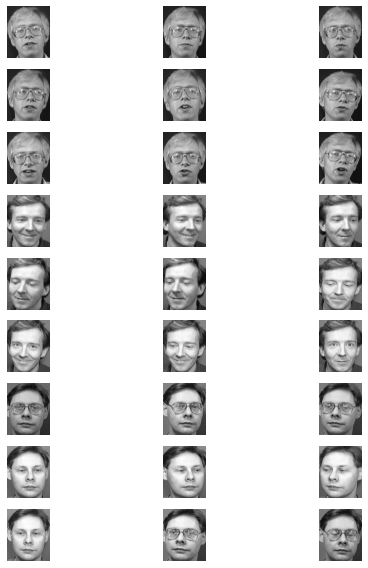

In [4]:
# loading only one image to get the dimensions
img = imread(path_1 + '1.pgm', as_gray=True)

# get the number of rows (irow) and columns (icol). 
# these values must to be the same for all images
irow, icol = img.shape

# allocation of vector that will have all images
S = np.zeros((irow*icol, M*3)) # img matrix

plt.figure(figsize=(8,8))

# runs the loop for 3 different directories
for pt in range(3):
    for i in range(((pt * M) + 1), (((pt + 1) * M) + 1)):

        img = imread(path_arr[pt] + '{}.pgm'.format(i - (9 * pt)), as_gray=True)

        plt.subplot(9,3,i)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        
        tmp = np.reshape(img, (irow*icol,1))
        S[:,i-1] = tmp[:,0] 


In [5]:
print('Size of each image:', img.shape, np.multiply(img.shape[0], img.shape[1]))

Size of each image: (112, 92) 10304


#### Normalizing all the images

In [6]:
# looping over all the loaded images in S to normalize
for i in range(S.shape[1]):
    tmp = S[:,i]

    m = np.mean(tmp)
    st = np.std(tmp)
    # calculation where are defined the new pixels intensities
    S[:,i] = (tmp - m) * ustd / st + um

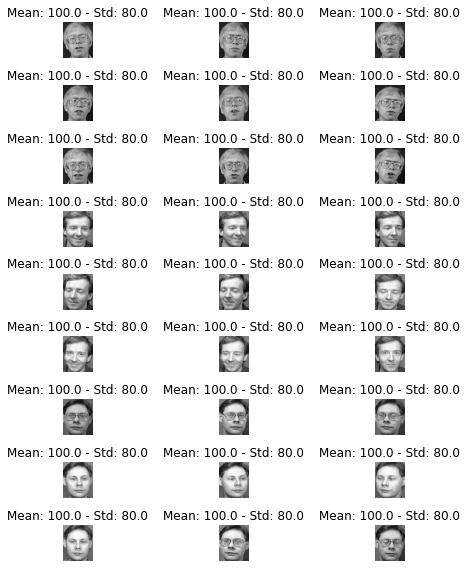

In [7]:
plt.figure(figsize=(8,8))

for i in range(3*M):
    img = np.reshape(S[:,i], (irow, icol))
    
    plt.subplot(9,3,i+1)
    plt.imshow(img, cmap='gray')
    
    plt.title('Mean: %.1f - Std: %.1f' % (np.mean(img), np.std(img)))
    plt.axis('off');

#### Finding Mean image

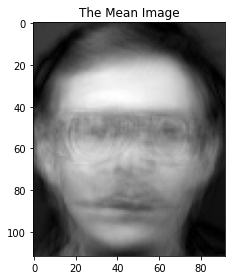

In [8]:
# calculates the mean of each row instead of each column
m = np.mean(S, axis=1)

# converts to unsigned 8-bit integer. Values range from 0 to 255
m = np.uint8(np.abs(m)).reshape(-1,1) 

img = np.reshape(m, (irow, icol))

plt.imshow(img, cmap='gray')
plt.title('The Mean Image');

#### Creating co-variance matrix L, sort and eliminate zero eigenvalue

In [9]:
dbx = S.copy()

A = dbx.T
L = np.matmul(A, A.T)

# vv is the eigenvector for L
# dd is the eigenvalue for  L = dbx.T*dbx

dd, vv = la.eig(L)

In [10]:
v = np.zeros(vv.shape)
d = np.zeros(dd.shape)

for i in range(vv.shape[1]):
    if (dd[i] > 1e-4):
        v[:,i] = vv[:,i]
        d[i] = dd[i]

C:\Users\punit\AppData\Local\Temp/ipykernel_24020/4082014964.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  d[i] = dd[i]


In [11]:
# sort d in ascending order
index = np.argsort(d)
B = d[index]

ind = np.zeros(index.shape).astype(int)

v_temp = np.zeros(v.shape)
d_temp = np.zeros(index.shape)

idx_len = len(index)
for i in range(idx_len):
    d_temp[i] = B[idx_len-1-i]
    ind[i] = idx_len-1-index[i]
    v_temp[:,ind[i]] = v[:,i]

d = d_temp
v = v_temp

#### Normalizing the eigenvectors

In [12]:
for i in range(v.shape[1]):
    kk = v[:,i]
    temp = np.sqrt(np.sum(np.power(kk,2)))
    v[:,i] = v[:,i] / temp

In [13]:
u = np.zeros(dbx.shape)

for i in range(v.shape[1]):
    temp = np.sqrt(d[i])
    u[:,i] = np.matmul(dbx, v[:,i]) / temp

In [14]:
for i in range(u.shape[1]):
    kk = u[:,i]
    temp = np.sqrt(np.sum(np.power(kk,2)))
    u[:,i] = u[:,i] / temp

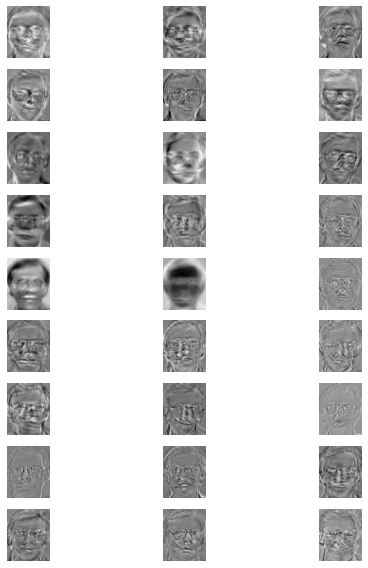

In [15]:
plt.figure(figsize=(8,8))

for i in range(3*M):
    img = np.reshape(u[:,i], (irow, icol))
    
    plt.subplot(9,3,i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off');

#### Checking the weight of each face in the training set

In [16]:
omega = np.zeros((3*M,3*M))
WW = np.zeros((3*M,1))

for dbx_itr in range(dbx.shape[1]):
    for i in range(u.shape[1]):
        t = u[:,i].T
        WeightOfImage = np.dot(t, dbx[:,dbx_itr].T)
        WW[i] = WeightOfImage
        
    omega[:,dbx_itr] = WW[:,0]

### Get same subject's new images from the gallery

#### First image from same gallery

In [17]:
# defining global labels for all charts
labels = ('1', '2', '3', '4', '5', '6', '7', '8', '9','10',
          '11', '12', '13', '14', '15', '16', '17', '18', '19','20',
         '21', '22', '23', '24', '25', '26', '27')


(-0.5, 91.5, 111.5, -0.5)

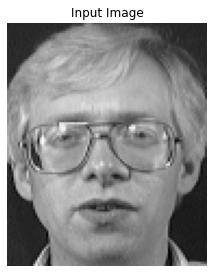

In [18]:
# using the last image of subject #1
InputImage = imread(path_1 + '10.pgm', as_gray=True)

plt.figure(figsize=(6,6))

plt.subplot(1,2,1)
plt.imshow(InputImage, cmap='gray')
plt.title('Input Image')
plt.axis('off')

In [19]:
InImage = np.reshape(InputImage, (irow*icol,1))

# Normalization
temp = InImage
me = np.mean(temp)
st = np.std(temp)
temp = (temp-me) * ustd/st + um
NormImage = temp

# Finding Difference: NormalizedImage - MeanImage
Difference = temp - m

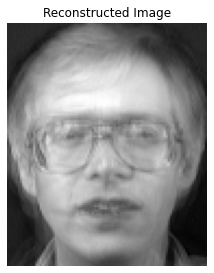

In [20]:
p = np.zeros((u.shape[1],1))
for i in range(u.shape[1]):
    # dot returns scalar vector product
    pare = np.dot(u[:,i], NormImage) 
    p[i] = pare

# m is the mean image, u is the eigenvector
ReshapedImage = m + np.matmul(u, p) 
ReshapedImage = np.reshape(ReshapedImage, (irow,icol))

# show the reconstructed image
plt.subplot(1,2,2)
plt.imshow(ReshapedImage, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off');

In [21]:
InImWeight = np.zeros((3*M,1))

for i in range(u.shape[1]):
    t = u[:,i].reshape(-1,1).T
    # scalar vector product of vectors t and Difference
    WeightOfInputImage = np.dot(t, Difference) 
    InImWeight[i] = WeightOfInputImage

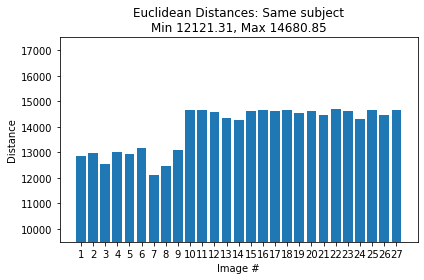

In [22]:
eSameSubject1 = np.zeros((3*M,1))

for i in range(omega.shape[1]):
    q = omega[:,i].reshape(-1,1)
    DiffWeight = InImWeight - q
    mag = np.linalg.norm(DiffWeight)
    eSameSubject1[i] = mag

# max/min Euclidean distance
MaximumValue = np.max(eSameSubject1) 
MinimumValue = np.min(eSameSubject1) 

plt.bar(np.arange(len(eSameSubject1)), eSameSubject1.flatten(), tick_label=labels)
plt.ylim([9500, 17500])

plt.title('Euclidean Distances: Same subject\n'\
          'Min {:.2f}, Max {:.2f}'.format(MinimumValue, MaximumValue))
plt.xlabel('Image #')
plt.ylabel('Distance');

#### Second image from gallery

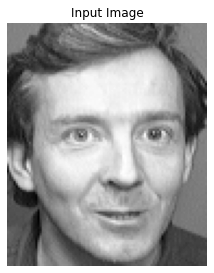

In [23]:
# using the last image of subject #2
InputImage = imread(path_2 + '10.pgm', as_gray=True)

plt.figure(figsize=(6,6))

plt.subplot(1,2,1)
plt.imshow(InputImage, cmap='gray')
plt.title('Input Image')
plt.axis('off');

In [24]:
InImage = np.reshape(InputImage, (irow*icol,1))

# Normalization
temp = InImage
me = np.mean(temp)
st = np.std(temp)
temp = (temp-me) * ustd/st + um
NormImage = temp

# Finding Difference: NormalizedImage - MeanImage
Difference = temp - m

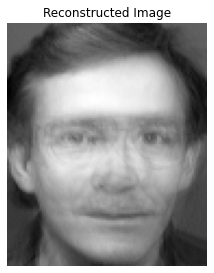

In [25]:
p = np.zeros((u.shape[1],1))
for i in range(u.shape[1]):
    # dot returns scalar vector product
    pare = np.dot(u[:,i], NormImage) 
    p[i] = pare

# m is the mean image, u is the eigenvector
ReshapedImage = m + np.matmul(u, p) 
ReshapedImage = np.reshape(ReshapedImage, (irow,icol))

# show the reconstructed image
plt.subplot(1,2,2)
plt.imshow(ReshapedImage, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off');

In [26]:
InImWeight = np.zeros((3*M,1))

for i in range(u.shape[1]):
    t = u[:,i].reshape(-1,1).T
    # scalar vector product of vectors t and Difference
    WeightOfInputImage = np.dot(t, Difference) 
    InImWeight[i] = WeightOfInputImage

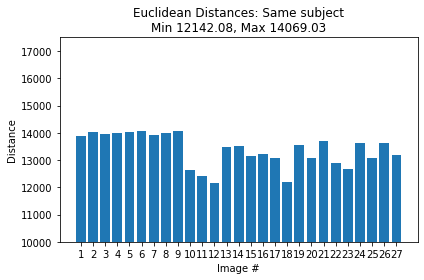

In [27]:
eSameSubject2 = np.zeros((3*M,1))

for i in range(omega.shape[1]):
    q = omega[:,i].reshape(-1,1)
    DiffWeight = InImWeight - q
    mag = np.linalg.norm(DiffWeight)
    eSameSubject2[i] = mag

# max/min Euclidean distance
MaximumValue = np.max(eSameSubject2) 
MinimumValue = np.min(eSameSubject2) 

plt.bar(np.arange(len(eSameSubject2)), eSameSubject2.flatten(), tick_label=labels)
plt.ylim([10000, 17500])

plt.title('Euclidean Distances: Same subject\n'\
          'Min {:.2f}, Max {:.2f}'.format(MinimumValue, MaximumValue))
plt.xlabel('Image #')
plt.ylabel('Distance');

#### Third image from the gallery

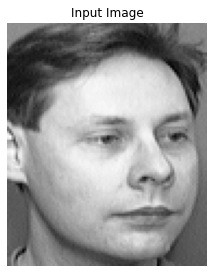

In [28]:
# using the last image of subject #1
InputImage = imread(path_3 + '10.pgm', as_gray=True)

plt.figure(figsize=(6,6))

plt.subplot(1,2,1)
plt.imshow(InputImage, cmap='gray')
plt.title('Input Image')
plt.axis('off');

In [29]:
InImage = np.reshape(InputImage, (irow*icol,1))

# Normalization
temp = InImage
me = np.mean(temp)
st = np.std(temp)
temp = (temp-me) * ustd/st + um
NormImage = temp

# Finding Difference: NormalizedImage - MeanImage
Difference = temp - m

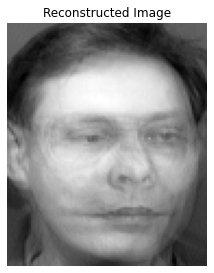

In [30]:
p = np.zeros((u.shape[1],1))
for i in range(u.shape[1]):
    # dot returns scalar vector product
    pare = np.dot(u[:,i], NormImage) 
    p[i] = pare

# m is the mean image, u is the eigenvector
ReshapedImage = m + np.matmul(u, p) 
ReshapedImage = np.reshape(ReshapedImage, (irow,icol))

# show the reconstructed image
plt.subplot(1,2,2)
plt.imshow(ReshapedImage, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off');

In [31]:
InImWeight = np.zeros((3*M,1))

for i in range(u.shape[1]):
    t = u[:,i].reshape(-1,1).T
    # scalar vector product of vectors t and Difference
    WeightOfInputImage = np.dot(t, Difference) 
    InImWeight[i] = WeightOfInputImage

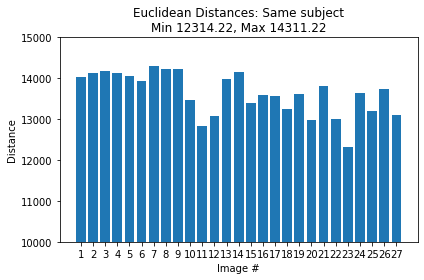

In [32]:
eSameSubject3 = np.zeros((3*M,1))

for i in range(omega.shape[1]):
    q = omega[:,i].reshape(-1,1)
    DiffWeight = InImWeight - q
    mag = np.linalg.norm(DiffWeight)
    eSameSubject3[i] = mag

# max/min Euclidean distance
MaximumValue = np.max(eSameSubject3) 
MinimumValue = np.min(eSameSubject3) 

plt.bar(np.arange(len(eSameSubject3)), eSameSubject3.flatten(), tick_label=labels)
plt.ylim([10000, 15000])

plt.title('Euclidean Distances: Same subject\n'\
          'Min {:.2f}, Max {:.2f}'.format(MinimumValue, MaximumValue))
plt.xlabel('Image #')
plt.ylabel('Distance');

### Getting new images of other subjects (not selected ones)
#### First image from other gallery

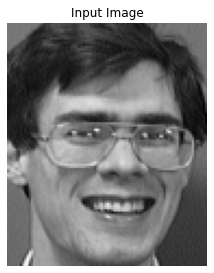

In [33]:
# using the last image of subject #1
path = 'ATT dataset/s20/'
InputImage = imread(path + '1.pgm', as_gray=True)
plt.figure(figsize=(6,6))

plt.subplot(1,2,1)
plt.imshow(InputImage, cmap='gray')
plt.title('Input Image')
plt.axis('off');


In [34]:
InImage = np.reshape(InputImage, (irow*icol,1))

# Normalization
temp = InImage
me = np.mean(temp)
st = np.std(temp)
temp = (temp-me) * ustd/st + um
NormImage = temp

# Finding Difference: NormalizedImage - MeanImage
Difference = temp - m

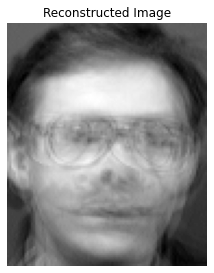

In [35]:
p = np.zeros((u.shape[1],1))
for i in range(u.shape[1]):
    # dot returns scalar vector product
    pare = np.dot(u[:,i], NormImage) 
    p[i] = pare

# m is the mean image, u is the eigenvector
ReshapedImage = m + np.matmul(u, p) 
ReshapedImage = np.reshape(ReshapedImage, (irow,icol))

# show the reconstructed image
plt.subplot(1,2,2)
plt.imshow(ReshapedImage, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off');

In [36]:
InImWeight = np.zeros((3*M,1))

for i in range(u.shape[1]):
    t = u[:,i].reshape(-1,1).T
    # scalar vector product of vectors t and Difference
    WeightOfInputImage = np.dot(t, Difference) 
    InImWeight[i] = WeightOfInputImage

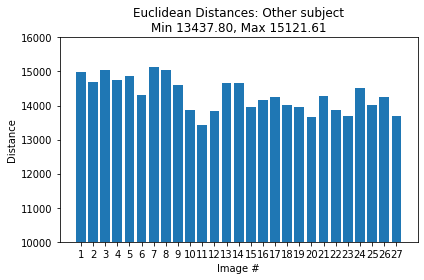

In [37]:
eDiffSubject1 = np.zeros((3*M,1))

for i in range(omega.shape[1]):
    q = omega[:,i].reshape(-1,1)
    DiffWeight = InImWeight - q
    mag = np.linalg.norm(DiffWeight)
    eDiffSubject1[i] = mag
    
# max/min Eucledian distance
MaximumValue = np.max(eDiffSubject1) 
MinimumValue = np.min(eDiffSubject1) 

plt.bar(np.arange(len(eDiffSubject1)), eDiffSubject1.flatten(), tick_label=labels)
plt.ylim([10000, 16000])

plt.title('Euclidean Distances: Other subject\n'\
          'Min {:.2f}, Max {:.2f}'.format(MinimumValue, MaximumValue))
plt.xlabel('Image #')
plt.ylabel('Distance');

#### Second image from other gallery

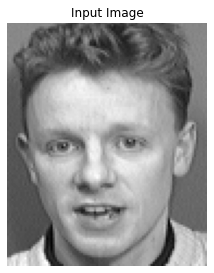

In [38]:
# using the last image of subject #1
path = './ATT dataset/s21/'
InputImage = imread(path + '10.pgm', as_gray=True)
plt.figure(figsize=(6,6))

plt.subplot(1,2,1)
plt.imshow(InputImage, cmap='gray')
plt.title('Input Image')
plt.axis('off');

In [39]:
InImage = np.reshape(InputImage, (irow*icol,1))

# Normalization
temp = InImage
me = np.mean(temp)
st = np.std(temp)
temp = (temp-me) * ustd/st + um
NormImage = temp

# Finding Difference: NormalizedImage - MeanImage
Difference = temp - m


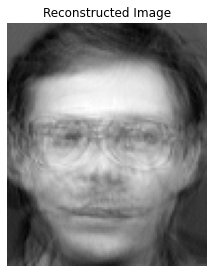

In [40]:
p = np.zeros((u.shape[1],1))
for i in range(u.shape[1]):
    # dot returns scalar vector product
    pare = np.dot(u[:,i], NormImage) 
    p[i] = pare

# m is the mean image, u is the eigenvector
ReshapedImage = m + np.matmul(u, p) 
ReshapedImage = np.reshape(ReshapedImage, (irow,icol))

# show the reconstructed image
plt.subplot(1,2,2)
plt.imshow(ReshapedImage, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off');

In [41]:
InImWeight = np.zeros((3*M,1))

for i in range(u.shape[1]):
    t = u[:,i].reshape(-1,1).T
    # scalar vector product of vectors t and Difference
    WeightOfInputImage = np.dot(t, Difference) 
    InImWeight[i] = WeightOfInputImage

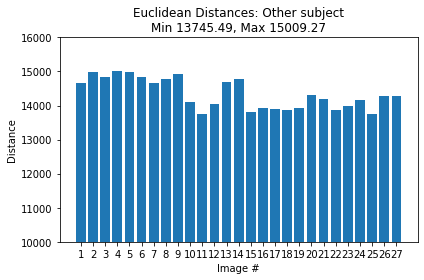

In [42]:
eDiffSubject2 = np.zeros((3*M,1))

for i in range(omega.shape[1]):
    q = omega[:,i].reshape(-1,1)
    DiffWeight = InImWeight - q
    mag = np.linalg.norm(DiffWeight)
    eDiffSubject2[i] = mag
    
# max/min Eucledian distance
MaximumValue = np.max(eDiffSubject2) 
MinimumValue = np.min(eDiffSubject2) 

labels = ('1', '2', '3', '4', '5', '6', '7', '8', '9','10',
          '11', '12', '13', '14', '15', '16', '17', '18', '19','20',
         '21', '22', '23', '24', '25', '26', '27')

plt.bar(np.arange(len(eDiffSubject2)), eDiffSubject2.flatten(), tick_label=labels)
plt.ylim([10000, 16000])

plt.title('Euclidean Distances: Other subject\n'\
          'Min {:.2f}, Max {:.2f}'.format(MinimumValue, MaximumValue))
plt.xlabel('Image #')
plt.ylabel('Distance');

### Acquisition of new images from non-human subject

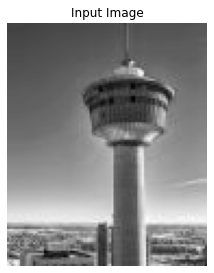

In [43]:
InputImage = imread('CalgaryTower.jpg', as_gray=True)
plt.figure(figsize=(6,6))

plt.subplot(1,2,1)
plt.imshow(InputImage, cmap='gray')
plt.title('Input Image')
plt.axis('off');

In [44]:
InImage = np.reshape(InputImage, (irow*icol,1))

# Normalization
temp = InImage
me = np.mean(temp)
st = np.std(temp)
temp = (temp-me) * ustd/st + um
NormImage = temp

# Finding Difference
Difference = temp - m

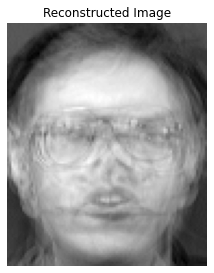

In [45]:
p = np.zeros((u.shape[1],1))
for i in range(u.shape[1]):
    # dot returns scalar vector product
    pare = np.dot(u[:,i], NormImage) 
    p[i] = pare

# m is the mean image, u is the eigenvector
ReshapedImage = m + np.matmul(u, p) 
ReshapedImage = np.reshape(ReshapedImage, (irow,icol))

# show the reconstructed image
plt.subplot(1,2,2)
plt.imshow(ReshapedImage, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off');

In [46]:
InImWeight = np.zeros((3*M,1))

for i in range(u.shape[1]):
    t = u[:,i].reshape(-1,1).T
    # scalar vector product of vectors t and Difference
    WeightOfInputImage = np.dot(t, Difference) 
    InImWeight[i] = WeightOfInputImage

Text(0, 0.5, 'Distance')

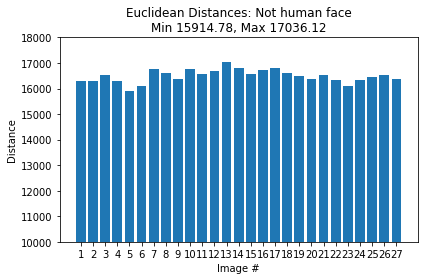

In [47]:
eTower = np.zeros((3*M,1))

for i in range(omega.shape[1]):
    q = omega[:,i].reshape(-1,1)
    DiffWeight = InImWeight - q
    mag = np.linalg.norm(DiffWeight)
    eTower[i] = mag
    
# max/min Eucledian distance
MaximumValue = np.max(eTower) 
MinimumValue = np.min(eTower) 

plt.bar(np.arange(len(eTower)), eTower.flatten(), tick_label=labels)
plt.ylim([10000, 18000])

plt.title('Euclidean Distances: Not human face\n'\
          'Min {:.2f}, Max {:.2f}'.format(MinimumValue, MaximumValue))
plt.xlabel('Image #')
plt.ylabel('Distance')

#### Euclidean Distance

|Images|Min|Max|
|:----------|-----------------|---------|
|Same subject 1   | 12121.31 | 14680.85 |
|Same subject 2   | 12142.08 | 14069.03 |
|Same subject 3   | 12314.22 | 14311.22 |
|Other subject 1  | 13437.80 | 15121.61 |
|Other subject 2  | 13745.49 | 15009.27 |
|Non-human Subjact| 15914.78 | 17036.12 |


## Exercise 2

In [48]:
# Set Threshold Values 
threshold1 = 14000
threshold2 = 15500


In [49]:
distances = [None] *6
distances[0] = eSameSubject1
distances[1] = eSameSubject2
distances[2] = eSameSubject3
distances[3] = eDiffSubject1
distances[4] = eDiffSubject2
distances[5] = eTower

for i in range(0,6):
    mean_of_distances = np.mean(distances[i]);
    if (mean_of_distances <= threshold1):
        print('Image is in the database')
    elif (mean_of_distances > threshold1 and mean_of_distances <= threshold2):
        print('Image is a face but not in the database')
    elif (mean_of_distances > threshold2):
        print('Image is not a face')

Image is in the database
Image is in the database
Image is in the database
Image is a face but not in the database
Image is a face but not in the database
Image is not a face


#### Conclusion of thresholds

The thresholds set are 14,000 and 15,500 as first and second respectively. Test results with these values set performed the correct matches, which means that these values are reasonable. The output of the threshold matched the expected output.

## Exercise 3

### Using 50 principal components

In [50]:
n_subjects = 10

# number of images should sum to 10
n_training_images = 5
n_test_images = 5

knn_neighbors = 3

print('For EACH of all the %d subjects:' % (n_subjects))
print('\t%d images will be used for TRAINING:' % (n_training_images), [x for x in range(1,n_training_images+1)])
print('\t%d images will be used for TEST:' % (n_test_images), [x for x in range(n_training_images+1, n_training_images+n_test_images+1)])

For EACH of all the 10 subjects:
	5 images will be used for TRAINING: [1, 2, 3, 4, 5]
	5 images will be used for TEST: [6, 7, 8, 9, 10]


In [51]:
# use the first 5 images from subjectID 1-n_subjects to train the classifier
trainingFaces = []
trainingLabels = []

for subjectId in range(1, n_subjects+1):
    for imageId in range(1, n_training_images+1):
        img = imread(dir_path + "s%d/%d.pgm" %(subjectId, imageId), as_gray=True)
        trainingFaces.append(np.reshape(img, (img.size,)))
        trainingLabels.append(subjectId)

# use the last 5 images from subjectID 1-20 to test the classifier
testingFaces = []
testingLabels = []

for subjectId in range(1, n_subjects+1):
    for imageId in range(n_training_images+1, n_training_images+n_test_images+1):
        img = imread(dir_path + "s%d/%d.pgm" %(subjectId, imageId), as_gray=True)
        testingFaces.append(np.reshape(img, (img.size,)))
        testingLabels.append(subjectId)
        
print('Training faces:', len(trainingFaces))
print('Size of each sample:', len(trainingFaces[0]))

Training faces: 50
Size of each sample: 10304


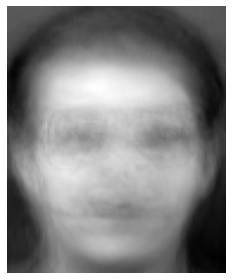

In [52]:
# n_components: number of principal components
n_components_pca = 50
pca = PCA(n_components=n_components_pca)

# fit the model, e.g., creating the covariance matrix... as we manually did in Lab 4
pca.fit(trainingFaces);

train_pca = pca.transform(trainingFaces)
test_pca = pca.transform(testingFaces)

plt.imshow(pca.mean_.reshape(img.shape))
plt.axis('off');

#### Eigenfaces

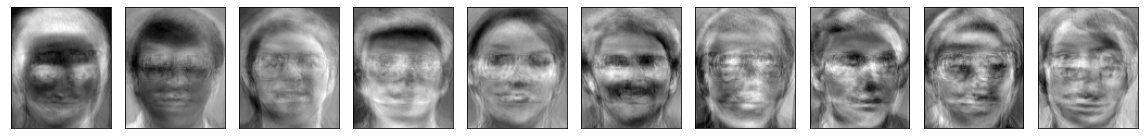

In [53]:
fig = plt.figure(figsize=(16, 6))
for i in range(10):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(img.shape))

#### Train the KNN

In [54]:
knn_pca = KNeighborsClassifier(n_neighbors=knn_neighbors).fit(train_pca, trainingLabels)

predictedLabels = knn_pca.predict(test_pca)

#### Evaluating the results

In [55]:
def prediction_evaluation(predicted_label, true_label, subject_id=1):
    # accuracy can be calculated as: 
    # predictedRight / (predictedRight + predictedWrong)
    right, wrong = 0, 0
    for predictedLabel, realLabel in zip(predicted_label, true_label):
        if predictedLabel == realLabel:
            right += 1
        else:
            wrong += 1
    acc = right / (right + wrong) 
    print("Overall Accuracy: %d%%" % (acc * 100))
    
    TP, FP, TN, FN = 0, 0, 0, 0
    for predictedLabel, realLabel in zip(predicted_label, true_label):
        if predictedLabel == subject_id and realLabel == subject_id:
            TP += 1
        if predictedLabel != subject_id and realLabel == subject_id:
            FN += 1
        if predictedLabel != subject_id and realLabel != subject_id:
            TN += 1
        if predictedLabel == subject_id and realLabel != subject_id:
            FP += 1
    print("Subject #%d:\n\tTP: %d, FP: %d, TN: %d, FN: %d" % (subject_id, TP, FP, TN, FN))
    
    # True Positive Rate (TPR) also known as Sensitivity or Recall
    TPR = TP / (TP + FN)
    # True Negative Rate (TNR) also known as Specificity
    TNR = TN / (TN + FP)
    # False Positive Rate (FPR)
    FPR = FP / (FP + TN)
    # False Negative Rate (FNR)
    FNR = FN / (TP + FN)

    print("\tTPR: %.2f%%, TNR: %.2f%%, FPR: %.2f%%, FNR: %.2f%%" % (TPR*100, TNR*100, FPR*100, FNR*100))

In [56]:
prediction_evaluation(predictedLabels, testingLabels)

Overall Accuracy: 98%
Subject #1:
	TP: 5, FP: 0, TN: 45, FN: 0
	TPR: 100.00%, TNR: 100.00%, FPR: 0.00%, FNR: 0.00%


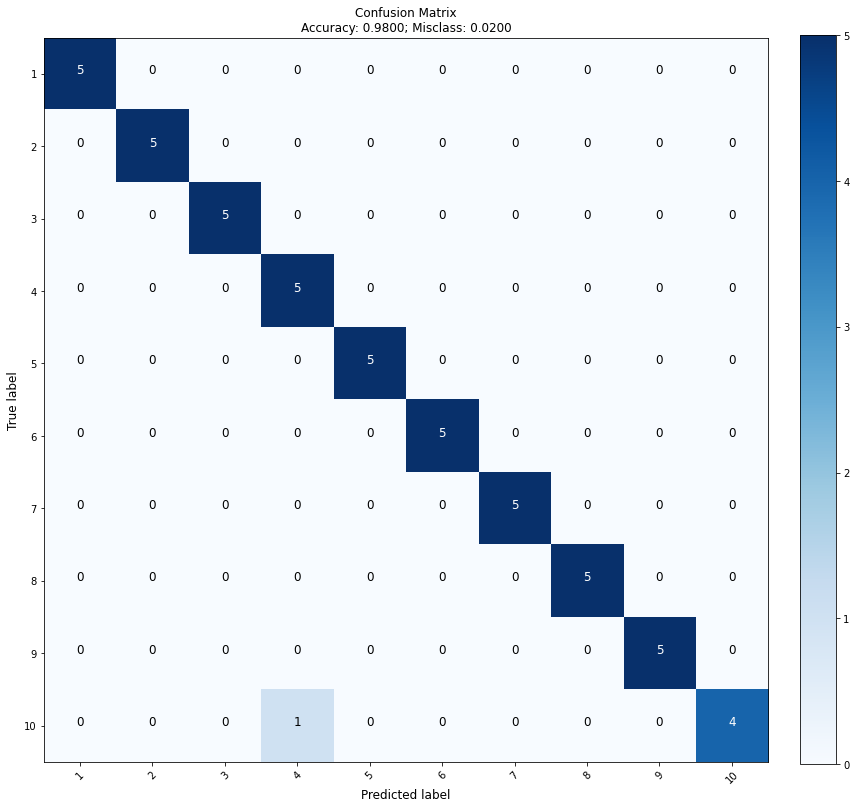

In [57]:
# Generate the confusion matrix
confusionMatrix = confusion_matrix(testingLabels, predictedLabels)

plot_confusion_matrix(cm=confusionMatrix,
                      target_names = [i for i in range(1, n_subjects+1)])

### Using 200 principal components

In [58]:
n_subjects = 40

# number of images should sum to 10
n_training_images = 5
n_test_images = 5

knn_neighbors = 3

print('For EACH of all the %d subjects:' % (n_subjects))
print('\t%d images will be used for TRAINING:' % (n_training_images), [x for x in range(1,n_training_images+1)])
print('\t%d images will be used for TEST:' % (n_test_images), [x for x in range(n_training_images+1, n_training_images+n_test_images+1)])

For EACH of all the 40 subjects:
	5 images will be used for TRAINING: [1, 2, 3, 4, 5]
	5 images will be used for TEST: [6, 7, 8, 9, 10]


In [59]:
# use the first 5 images from subjectID 1-n_subjects to train the classifier
trainingFaces = []
trainingLabels = []

for subjectId in range(1, n_subjects+1):
    for imageId in range(1, n_training_images+1):
        img = imread(dir_path + "s%d/%d.pgm" %(subjectId, imageId), as_gray=True)
        trainingFaces.append(np.reshape(img, (img.size,)))
        trainingLabels.append(subjectId)

# use the last 5 images from subjectID 1-20 to test the classifier
testingFaces = []
testingLabels = []

for subjectId in range(1, n_subjects+1):
    for imageId in range(n_training_images+1, n_training_images+n_test_images+1):
        img = imread(dir_path + "s%d/%d.pgm" %(subjectId, imageId), as_gray=True)
        testingFaces.append(np.reshape(img, (img.size,)))
        testingLabels.append(subjectId)
        
print('Training faces:', len(trainingFaces))
print('Size of each sample:', len(trainingFaces[0]))

Training faces: 200
Size of each sample: 10304


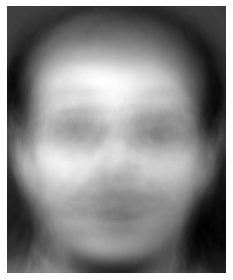

In [60]:
# n_components: number of principal components
n_components_pca = 200
pca = PCA(n_components=n_components_pca)

# fit the model, e.g., creating the covariance matrix... as we manually did in Lab 4
pca.fit(trainingFaces);

train_pca = pca.transform(trainingFaces)
test_pca = pca.transform(testingFaces)

plt.imshow(pca.mean_.reshape(img.shape))
plt.axis('off');

#### Eigenfaces

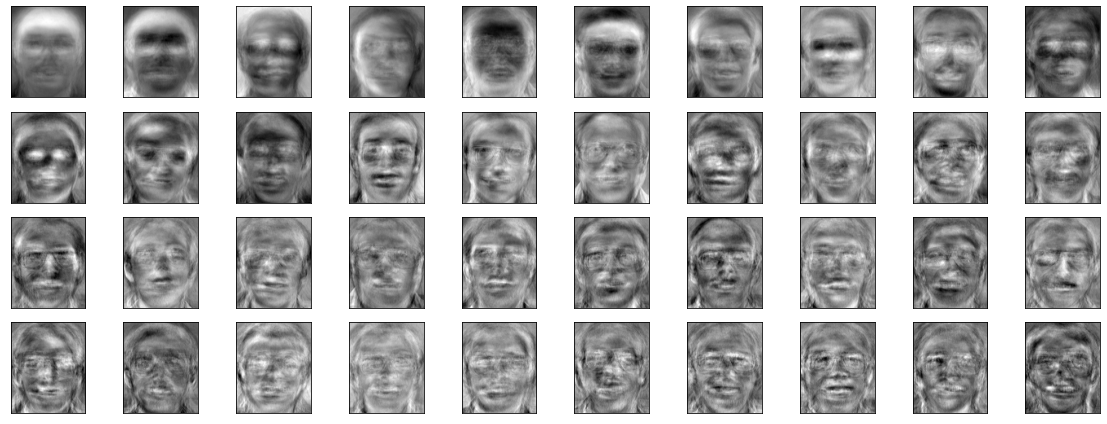

In [61]:
fig = plt.figure(figsize=(16, 6))
for i in range(40):
    ax = fig.add_subplot(4, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(img.shape))

#### Train the KNN

In [62]:
knn_pca = KNeighborsClassifier(n_neighbors=knn_neighbors).fit(train_pca, trainingLabels)

predictedLabels = knn_pca.predict(test_pca)

#### Evaluating the results

In [63]:
prediction_evaluation(predictedLabels, testingLabels)

Overall Accuracy: 86%
Subject #1:
	TP: 4, FP: 0, TN: 195, FN: 1
	TPR: 80.00%, TNR: 100.00%, FPR: 0.00%, FNR: 20.00%


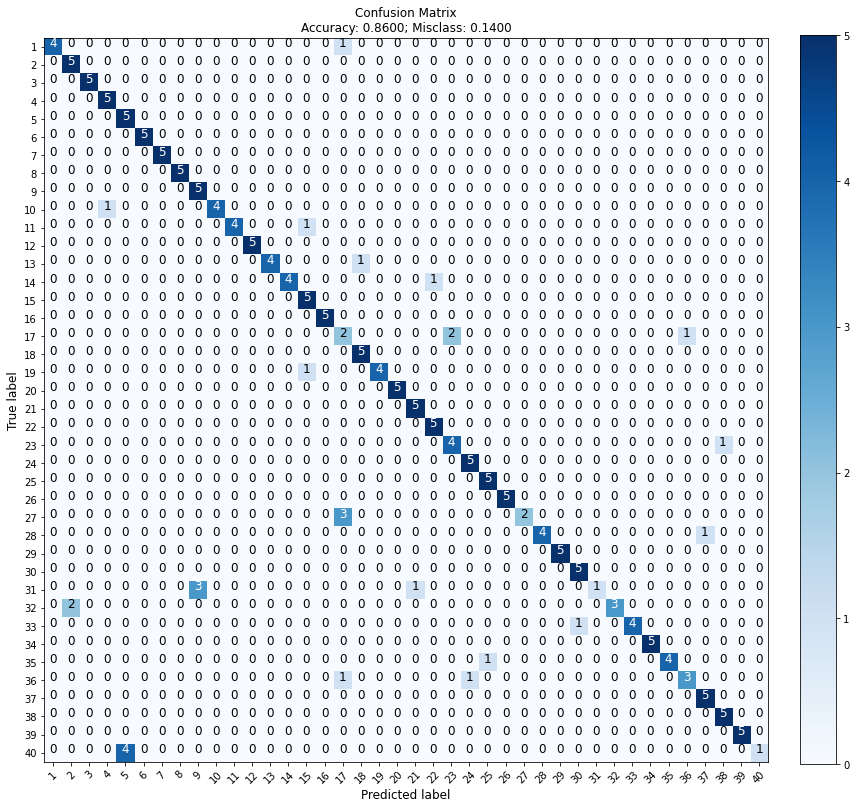

In [64]:
# Generate the confusion matrix
confusionMatrix = confusion_matrix(testingLabels, predictedLabels)

plot_confusion_matrix(cm=confusionMatrix,
                      target_names = [i for i in range(1, n_subjects+1)])

|# of Components|Accuracy|TP(TPR)|FP(FPR)|TN(TNR)|FN(FNR)|
|---------------|--------|-------|-------|-------|-------|
|         50    |98%     |5(100%)|0(0%)  |45(100%)|0(0%) |
|         100   |91%     |4(80%) |0(0%)  |95(100%)|1(20%) |
|         200   |86%     |4(80%) |0(0%)  |195(100%)|1(20%) |

The result shows that as the number of components used in the PCA increases, accuracy of the test drops.

## Exercise 4
### KNN neighbors of 5

In [65]:
n_subjects = 20

# number of images should sum to 10
n_training_images = 8
n_test_images = 2

knn_neighbors = 5

print('For EACH of all the %d subjects:' % (n_subjects))
print('\t%d images will be used for TRAINING:' % (n_training_images), [x for x in range(1,n_training_images+1)])
print('\t%d images will be used for TEST:' % (n_test_images), [x for x in range(n_training_images+1, n_training_images+n_test_images+1)])

For EACH of all the 20 subjects:
	8 images will be used for TRAINING: [1, 2, 3, 4, 5, 6, 7, 8]
	2 images will be used for TEST: [9, 10]


In [66]:
# use the first 5 images from subjectID 1-n_subjects to train the classifier
trainingFaces = []
trainingLabels = []

for subjectId in range(1, n_subjects+1):
    for imageId in range(1, n_training_images+1):
        img = imread(dir_path + "s%d/%d.pgm" %(subjectId, imageId), as_gray=True)
        trainingFaces.append(np.reshape(img, (img.size,)))
        trainingLabels.append(subjectId)

# use the last 5 images from subjectID 1-20 to test the classifier
testingFaces = []
testingLabels = []
for subjectId in range(1, n_subjects+1):
    for imageId in range(n_training_images+1, n_training_images+n_test_images+1):
        img = imread(dir_path + "s%d/%d.pgm" %(subjectId, imageId), as_gray=True)
        testingFaces.append(np.reshape(img, (img.size,)))
        testingLabels.append(subjectId)
        
print('Training faces:', len(trainingFaces))
print('Size of each sample:', len(trainingFaces[0]))

Training faces: 160
Size of each sample: 10304


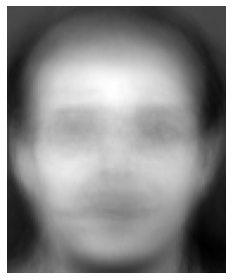

In [67]:
# n_components: number of principal components
n_components_pca = 100
pca = PCA(n_components=n_components_pca)

# fit the model, e.g., creating the covariance matrix... as we manually did in Lab 4
pca.fit(trainingFaces);

train_pca = pca.transform(trainingFaces)
test_pca = pca.transform(testingFaces)

plt.imshow(pca.mean_.reshape(img.shape))
plt.axis('off');

#### Eigenfaces

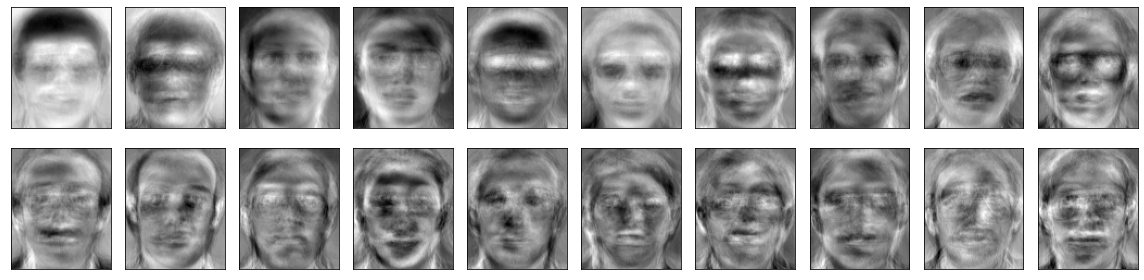

In [68]:
fig = plt.figure(figsize=(16, 6))
for i in range(20):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(img.shape))

#### Train the KNN

In [69]:
knn_pca = KNeighborsClassifier(n_neighbors=knn_neighbors).fit(train_pca, trainingLabels)
predictedLabels = knn_pca.predict(test_pca)

#### Evaluating the results

In [70]:
prediction_evaluation(predictedLabels, testingLabels)

Overall Accuracy: 92%
Subject #1:
	TP: 2, FP: 0, TN: 38, FN: 0
	TPR: 100.00%, TNR: 100.00%, FPR: 0.00%, FNR: 0.00%


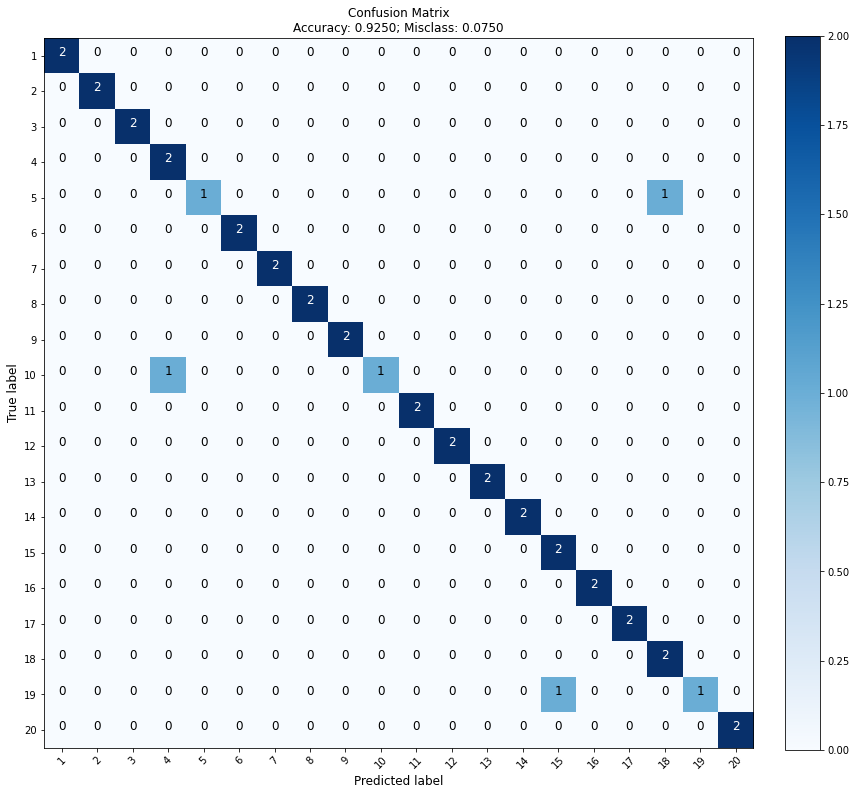

In [71]:
# Generate the confusion matrix
confusionMatrix = confusion_matrix(testingLabels, predictedLabels)

plot_confusion_matrix(cm=confusionMatrix,
                      target_names = [i for i in range(1, n_subjects+1)])

### KNN neighbors of 11

In [72]:
n_subjects = 20

# number of images should sum to 10
n_training_images = 8
n_test_images = 2

knn_neighbors = 11

print('For EACH of all the %d subjects:' % (n_subjects))
print('\t%d images will be used for TRAINING:' % (n_training_images), [x for x in range(1,n_training_images+1)])
print('\t%d images will be used for TEST:' % (n_test_images), [x for x in range(n_training_images+1, n_training_images+n_test_images+1)])

For EACH of all the 20 subjects:
	8 images will be used for TRAINING: [1, 2, 3, 4, 5, 6, 7, 8]
	2 images will be used for TEST: [9, 10]


In [73]:
# use the first 5 images from subjectID 1-n_subjects to train the classifier
trainingFaces = []
trainingLabels = []

for subjectId in range(1, n_subjects+1):
    for imageId in range(1, n_training_images+1):
        img = imread(dir_path + "s%d/%d.pgm" %(subjectId, imageId), as_gray=True)
        trainingFaces.append(np.reshape(img, (img.size,)))
        trainingLabels.append(subjectId)

# use the last 5 images from subjectID 1-20 to test the classifier
testingFaces = []
testingLabels = []
for subjectId in range(1, n_subjects+1):
    for imageId in range(n_training_images+1, n_training_images+n_test_images+1):
        img = imread(dir_path + "s%d/%d.pgm" %(subjectId, imageId), as_gray=True)
        testingFaces.append(np.reshape(img, (img.size,)))
        testingLabels.append(subjectId)
        
print('Training faces:', len(trainingFaces))
print('Size of each sample:', len(trainingFaces[0]))

Training faces: 160
Size of each sample: 10304


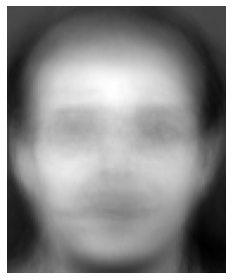

In [74]:
# n_components: number of principal components
n_components_pca = 100
pca = PCA(n_components=n_components_pca)

# fit the model, e.g., creating the covariance matrix... as we manually did in Lab 4
pca.fit(trainingFaces);

train_pca = pca.transform(trainingFaces)
test_pca = pca.transform(testingFaces)

plt.imshow(pca.mean_.reshape(img.shape))
plt.axis('off');

#### Eigenfaces

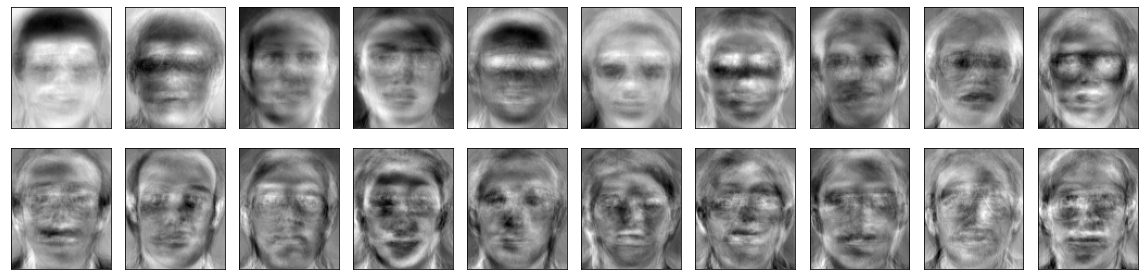

In [75]:
fig = plt.figure(figsize=(16, 6))
for i in range(20):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(img.shape))

#### Train the KNN

In [76]:
knn_pca = KNeighborsClassifier(n_neighbors=knn_neighbors).fit(train_pca, trainingLabels)
predictedLabels = knn_pca.predict(test_pca)

#### Evaluation of the results

In [77]:
prediction_evaluation(predictedLabels, testingLabels)

Overall Accuracy: 77%
Subject #1:
	TP: 1, FP: 0, TN: 38, FN: 1
	TPR: 50.00%, TNR: 100.00%, FPR: 0.00%, FNR: 50.00%


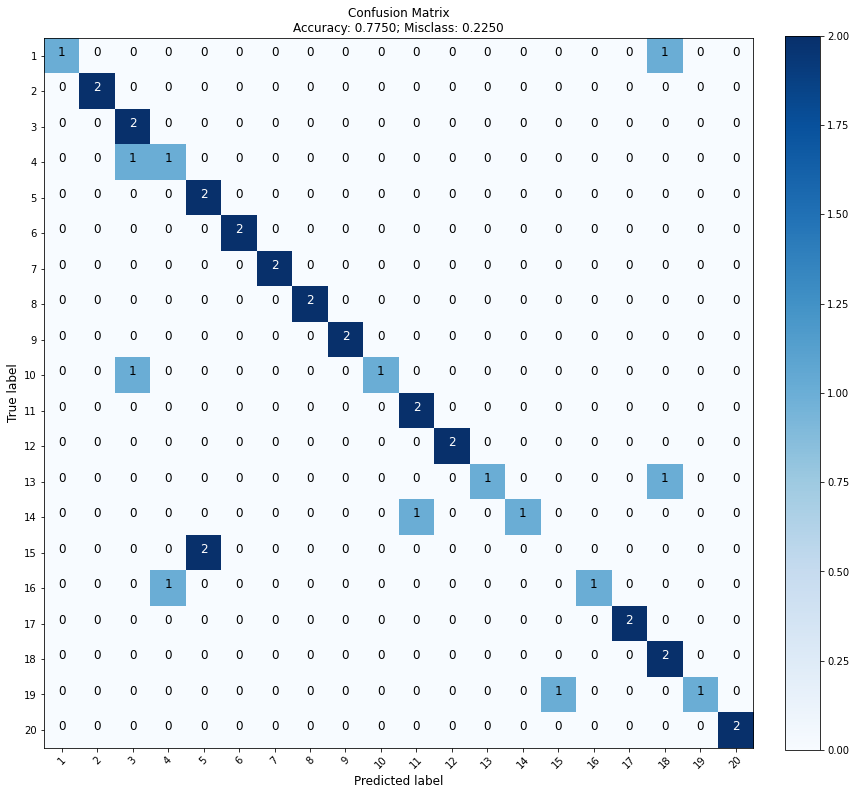

In [78]:
# Generate the confusion matrix
confusionMatrix = confusion_matrix(testingLabels, predictedLabels)

plot_confusion_matrix(cm=confusionMatrix,
                      target_names = [i for i in range(1, n_subjects+1)])

#### Comparison of two different numbers of KNN neighbors used

|# of KNN neighbors|Accuracy|TP(TPR)|FP(FPR)|TN(TNR)|FN(FNR)|
|---------------|--------|-------|-------|-------|-------|
|         5    |92%     |2(100%)|0(0%)  |38(100%)|0(0%) |
|         11   |80%     |1(50%) |0(0%)  |38(100%)|1(50%) |

The result shows that as the number of KNN neighbors set increases, the accuracy of the test result drops.